<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Description" data-toc-modified-id="Project-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Dataset-Loading-&amp;-Exploration" data-toc-modified-id="Dataset-Loading-&amp;-Exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataset Loading &amp; Exploration</a></span><ul class="toc-item"><li><span><a href="#Detected-Problems" data-toc-modified-id="Detected-Problems-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Detected Problems</a></span><ul class="toc-item"><li><span><a href="#Column-names" data-toc-modified-id="Column-names-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Column names</a></span></li><li><span><a href="#Gaps-in-tenure" data-toc-modified-id="Gaps-in-tenure-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Gaps in tenure</a></span></li><li><span><a href="#Check-for-duplicates" data-toc-modified-id="Check-for-duplicates-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Check for duplicates</a></span></li><li><span><a href="#Transformation-of-categorical-features-for-the-task-of-classification" data-toc-modified-id="Transformation-of-categorical-features-for-the-task-of-classification-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Transformation of categorical features for the task of classification</a></span></li><li><span><a href="#Samples-formation" data-toc-modified-id="Samples-formation-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Samples formation</a></span></li><li><span><a href="#Feature-Extraction-for-Training" data-toc-modified-id="Feature-Extraction-for-Training-3.1.6"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>Feature Extraction for Training</a></span></li><li><span><a href="#Feature-scaling" data-toc-modified-id="Feature-scaling-3.1.7"><span class="toc-item-num">3.1.7&nbsp;&nbsp;</span>Feature scaling</a></span></li></ul></li></ul></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Training</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li></ul></li><li><span><a href="#Solution-for-Imbalance" data-toc-modified-id="Solution-for-Imbalance-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Solution for Imbalance</a></span><ul class="toc-item"><li><span><a href="#Balancing-Classes-with-Parameters" data-toc-modified-id="Balancing-Classes-with-Parameters-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Balancing Classes with Parameters</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Downsampling</a></span></li></ul></li><li><span><a href="#Model-Analysis" data-toc-modified-id="Model-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Analysis</a></span><ul class="toc-item"><li><span><a href="#Model-Testing" data-toc-modified-id="Model-Testing-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Model Testing</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

# Bank Churn Prediction

## Project Description

Customers has begun to leave Beta-Bank. Every month. A little, but noticeable. Marketing analysts figured it was cheaper to keep current customers than to attract new ones.

It is necessary to predict whether the client will leave the bank in the near future or not. You are provided with historical data on customer behavior and termination of agreements with the bank.

---

**Build a model with an extremely large *F1*-measure. To pass the project successfully, you need to bring the metric to 0.59**. Check the *F1*-measure on the test set yourself.

Additionally measure *AUC-ROC*, compare its value with *F1*-measure.

Data Source: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Imports

In [ ]:
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

import warnings

## Dataset Loading & Exploration

In [1]:
df = pd.read_csv('/datasets/Churn.csv')
df.name = 'churn'

df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Detected Problems


1. Column names: lower case


2. Gaps in `tenure` 


3. Check for duplicates


4. Transformation of categorical features for the task of classification


5. Split the data into samples before training


6. Feature Extraction for Training


7. Feature scaling

#### Column names

Let's bring all the columns of the dataframe to lowercase for ease of use and to prevent potential errors in the process

In [4]:
df.columns = [x.lower() for x in df.columns]
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

#### Gaps in tenure

In [5]:
df['tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

In [6]:
df[df['tenure'].isnull()]['rownumber'].count()

909

We are able to see that there are 909 missing values for `tenure`, and there are zero values as well. These gaps must have appeared because of a technical error. 
Most likely, not for all clients with zero customer service period, there was given the correct value. Therefore, we will fill in all the gaps in this field with 0.

In [7]:
df['tenure'] = df['tenure'].fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
rownumber          10000 non-null int64
customerid         10000 non-null int64
surname            10000 non-null object
creditscore        10000 non-null int64
geography          10000 non-null object
gender             10000 non-null object
age                10000 non-null int64
tenure             10000 non-null float64
balance            10000 non-null float64
numofproducts      10000 non-null int64
hascrcard          10000 non-null int64
isactivemember     10000 non-null int64
estimatedsalary    10000 non-null float64
exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


#### Check for duplicates

In [8]:
df.duplicated().sum()

0

#### Transformation of categorical features for the task of classification

Since there are many categorical features in our data, based on which training and prediction will be carried out, we need to bring them into the right format to work correctly with them. 

In order to convert categorical features to numerical ones, we are going to use the **OHE** (**_One-Hot Encoding_**) technique

In [9]:
# But before that, I'd like to take a closer look at the geography field to make sure there aren't too many values,
# so as not to create an uncountable number of dummy variables

df['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

There are only 3 countries - OHE will definitely suit our task.

We should also take into account the fact that the specificity of this technique is to create dummy variables for all categorical features, therefore, in order to exclude the possibility of falling into the dummy trap, set the parameter **`drop_fisrt=True`**

In [10]:
# OHE

df_ohe = pd.get_dummies(df, columns=['geography','gender'], drop_first=True)

In [11]:
pd.set_option('display.max_columns', None)

df_ohe.head(5)

,rownumber,customerid,surname,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,1,15634602,Hargrave,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


#### Samples formation

There is no prepared separate test set. This means that the data needs to be divided into **three parts**: training, validation and test. The sizes of the test and validation sets are usually equal. Let's split the initial data in the ratio **3:1:1**

In [12]:
# Let's first divide our initial dataset into a training sample [df_train] 
# and a sample allocated for test and validation [df2]

from sklearn.model_selection import train_test_split

df_train, df2 = train_test_split(df_ohe, test_size=0.4, random_state=12345)

In [13]:
# Now divide the dataset allocated for test and validation [df2],
# validation [df_valid] and test [df_test] samples

df_test, df_valid = train_test_split(df2, test_size=0.5, random_state=12345)

In [14]:
# Check the ratio

dataframes = [df_train, df_test, df_valid]
df_train.name = 'Обучающая выборка'
df_test.name = 'Тестовая выборка'
df_valid.name = 'Валидационнная выборка'

for d in dataframes:
    print(d.name, ': {:2}'.format(round(d.shape[0] / df.shape[0], 2)))

Обучающая выборка : 0.6
Тестовая выборка : 0.2
Валидационнная выборка : 0.2


#### Feature Extraction for Training

In [15]:
# Training
features_train = df_train.drop(['exited', 'rownumber', 'customerid', 'surname'], axis=1)
target_train = df_train['exited']

# Test
features_test = df_test.drop(['exited', 'rownumber', 'customerid', 'surname'], axis=1)
target_test = df_test['exited']

# Validation
features_valid = df_valid.drop(['exited', 'rownumber', 'customerid', 'surname'], axis=1)
target_valid = df_valid['exited']

#### Feature scaling

Obviously, the dimensions of such fields as `Age`, `balance`, `numofproducts` and so on. will be very different. Without feature scaling, we might run into a problem - algorithms might decide that higher values might have more effect than smaller values - hence deciding that some features are even more important than others. Although in reality this is not the case at all. Feature scaling can help to avoid this problem.

Let's use standardization.

In [16]:
from sklearn.preprocessing import StandardScaler

numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

## Model Training

First, let's examine the class frequency in our data.

0    0.7963
1    0.2037
Name: exited, dtype: float64

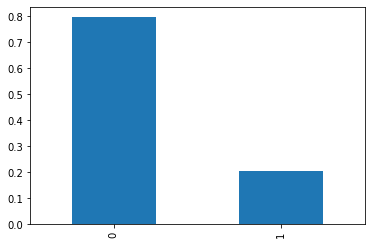

In [17]:
class_frequency = df_ohe['exited'].value_counts(normalize=True)
display(class_frequency)

class_frequency.plot(kind='bar')

Thus, we can observe a sufficient significant imbalance of classes - negative values exceed positive ones by almost 4 times. Class ratio is far from ideal 1:1

We will first study the models without taking into account this imbalance, then we will correct this problem and compare the results

### DecisionTreeClassifier

To select the best decision tree model - we can affect one of the main parameters - the maximum depth. First, one should select the whole desired area, and then select the best parameter in the best one.

In [18]:
%%time
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

best_model = None
best_depth = 0
best_f1_tree = 0
best_auc_tree = 0

for depth in range(1, 101, 5): 
    tree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    tree_model.fit(features_train, target_train) 
    
    tree_predictions_valid = tree_model.predict(features_valid) 
    tree_probabilities_valid = tree_model.predict_proba(features_valid)
    
    tree_f1 = f1_score(target_valid, tree_predictions_valid)
    tree_probabilities_one_valid = tree_probabilities_valid[:, 1]
    tree_auc_roc = roc_auc_score(target_valid, tree_probabilities_one_valid)
    
    if tree_f1 > best_f1_tree:
        best_model = tree_model
        best_depth = depth
        best_f1_tree = tree_f1
        best_auc_tree = tree_auc_roc
        
print('F1-мера наилучшей модели на валидационной выборке:', best_f1_tree) 
print('Значение AUC-ROC для наилучшего результата F1-меры:', best_auc_tree)
print('Глубина дерева:', best_depth) 

F1-мера наилучшей модели на валидационной выборке: 0.5337423312883436
Значение AUC-ROC для наилучшего результата F1-меры: 0.8394526219847661
Глубина дерева: 6
CPU times: user 818 ms, sys: 3.44 ms, total: 822 ms
Wall time: 835 ms


Therefore, now we choose the best parameter on the 2nd five

In [19]:
%%time

best_model = None
best_depth = 0
best_f1_tree = 0
best_auc_tree = 0

for depth in range(6, 11): 
    tree_model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    tree_model.fit(features_train, target_train) 
    
    tree_predictions_valid = tree_model.predict(features_valid) 
    tree_probabilities_valid = tree_model.predict_proba(features_valid)
    
    tree_f1 = f1_score(target_valid, tree_predictions_valid)
    tree_probabilities_one_valid = tree_probabilities_valid[:, 1]
    tree_auc_roc = roc_auc_score(target_valid, tree_probabilities_one_valid)
    
    if tree_f1 > best_f1_tree:
        best_model = tree_model
        best_depth = depth
        best_f1_tree = tree_f1
        best_auc_tree = tree_auc_roc
        
print('F1-мера наилучшей модели на валидационной выборке:', best_f1_tree) 
print('Значение AUC-ROC для наилучшего результата F1-меры:', best_auc_tree)
print('Глубина дерева:', best_depth) 

F1-мера наилучшей модели на валидационной выборке: 0.53781512605042
Значение AUC-ROC для наилучшего результата F1-меры: 0.7843565377598487
Глубина дерева: 9
CPU times: user 149 ms, sys: 3.81 ms, total: 153 ms
Wall time: 166 ms


By examining the first selected model and based on the results obtained for the mainland **F1-score**, we can say that the model performs best when the hyperparameter **max_depth = 9** is set.

### RandomForestClassifier

In [20]:
%%time

from sklearn.ensemble import RandomForestClassifier

best_model = None
best_est = 0
best_depth = 0
best_f1_forest = 0
best_auc_forest = 0

for est in range(1, 101, 10):
    for depth in range (1, 101, 10):
        forest_model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        forest_model.fit(features_train, target_train) 
        
        forest_predictions_valid = forest_model.predict(features_valid)
        forest_probabilities_valid = forest_model.predict_proba(features_valid)
        
        forest_f1 = f1_score(target_valid, forest_predictions_valid)
        forest_probabilities_one_valid = forest_probabilities_valid[:, 1]
        forest_auc_roc = roc_auc_score(target_valid, forest_probabilities_one_valid)
    
        if forest_f1 > best_f1_forest:
            best_model = forest_model
            best_f1_forest = forest_f1
            best_est = est
            best_depth = depth
            best_auc_forest = forest_auc_roc

print("F1-мера наилучшей модели на валидационной выборке:", best_f1_forest)
print('Значение AUC-ROC для наилучшего результата F1-меры:', best_auc_forest)
print('Количество деревьев:', best_est)
print('Максимальная глубина:', best_depth)

F1-мера наилучшей модели на валидационной выборке: 0.5508982035928144
Значение AUC-ROC для наилучшего результата F1-меры: 0.8476316613973627
Количество деревьев: 51
Максимальная глубина: 31
CPU times: user 41.8 s, sys: 141 ms, total: 41.9 s
Wall time: 42 s


Thus, we conclude that the optimal number of trees is in the interval [51;60], while the optimal depth value lies in [31;40]. Let's choose the best values on the intervals.

In [21]:
%%time

from sklearn.ensemble import RandomForestClassifier

best_model = None
best_est = 0
best_depth = 0
best_f1_forest = 0
best_auc_forest = 0

for est in range(51, 61):
    for depth in range(31, 41):
        forest_model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        forest_model.fit(features_train, target_train) 
        
        forest_predictions_valid = forest_model.predict(features_valid)
        forest_probabilities_valid = forest_model.predict_proba(features_valid)
        
        forest_f1 = f1_score(target_valid, forest_predictions_valid)
        forest_probabilities_one_valid = forest_probabilities_valid[:, 1]
        forest_auc_roc = roc_auc_score(target_valid, forest_probabilities_one_valid)
    
        if forest_f1 > best_f1_forest:
            best_model = forest_model
            best_f1_forest = forest_f1
            best_est = est
            best_depth = depth
            best_auc_forest = forest_auc_roc

print("F1-мера наилучшей модели на валидационной выборке:", best_f1_forest)
print('Значение AUC-ROC для наилучшего результата F1-меры:', best_auc_forest)
print('Количество деревьев:', best_est)
print('Максимальная глубина:', best_depth)

F1-мера наилучшей модели на валидационной выборке: 0.5568862275449102
Значение AUC-ROC для наилучшего результата F1-меры: 0.8480251727327375
Количество деревьев: 55
Максимальная глубина: 31
CPU times: user 54.8 s, sys: 72.1 ms, total: 54.8 s
Wall time: 54.9 s


The Random Forest model showed the best result of the F1-measure when applying the following parameters:

- Number of trees: **55**


- Maximum tree depth: **31**

### LogisticRegression

In [22]:
%%time

from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(random_state=12345)
logit_model.fit(features_train, target_train) 

logit_predictions_valid = logit_model.predict(features_valid)
logit_probabilities_valid = logit_model.predict_proba(features_valid)
        
logit_f1 = f1_score(target_valid, logit_predictions_valid)
logit_probabilities_one_valid = logit_probabilities_valid[:, 1]
logit_auc_roc = roc_auc_score(target_valid, logit_probabilities_one_valid)

print("F1-мера наилучшей модели на валидационной выборке:", logit_f1)
print('Значение AUC-ROC для наилучшего результата F1-меры:', logit_auc_roc)

F1-мера наилучшей модели на валидационной выборке: 0.2743055555555555
Значение AUC-ROC для наилучшего результата F1-меры: 0.738656005132887
CPU times: user 54.4 ms, sys: 44 ms, total: 98.4 ms
Wall time: 48 ms


In [23]:
best_results_prior = [[best_f1_tree, best_f1_forest, logit_f1], [best_auc_tree, best_auc_forest, logit_auc_roc]]
models = ['Решающее дерево', 'Случайный лес', 'Логистическая регрессия']

research_result = pd.DataFrame(data = best_results_prior, columns = models)
research_result.rename({0: 'F1-score', 1: 'AUC-ROC'}, axis='index')

,Решающее дерево,Случайный лес,Логистическая регрессия
F1-score,0.537815,0.556886,0.274306
AUC-ROC,0.784357,0.848025,0.738656


Thus, the **Random Forest** model with the number of trees = 55 and the maximum tree depth = 31 won has shown the best result for predicting customer churn on the validation sample. **The results were obtained without taking into account the existing class imbalance**.

## Solution for Imbalance

According to our results, the random forest turned out to be the best model. Therefore, we will take the forest further in order to select new parameters, but now taking into account the imbalance of classes.
We will use new parameters and improve the quality of our model.

### Balancing Classes with Parameters

Let's give objects of a rare class bigger weight.

In [24]:
%%time

best_model_wh = None
best_est_wh = 0
best_depth_wh = 0
best_f1_forest_wh = 0
best_auc_forest_wh = 0

for est in range(1, 101, 10):
    for depth in range (1, 101, 10):
        forest_model_wh = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth,\
                                              class_weight='balanced') 
        forest_model_wh.fit(features_train, target_train) 
        
        forest_predictions_valid_wh = forest_model_wh.predict(features_valid)
        forest_probabilities_valid_wh = forest_model_wh.predict_proba(features_valid)
        
        forest_f1_wh = f1_score(target_valid, forest_predictions_valid_wh)
        forest_probabilities_one_valid_wh = forest_probabilities_valid_wh[:, 1]
        forest_auc_roc_wh = roc_auc_score(target_valid, forest_probabilities_one_valid_wh)
    
        if forest_f1_wh > best_f1_forest_wh:
            best_model_wh = forest_model_wh
            best_f1_forest_wh = forest_f1_wh
            best_est_wh = est
            best_depth_wh = depth
            best_auc_forest_wh = forest_auc_roc_wh

print("F1-мера наилучшей модели на валидационной выборке:", best_f1_forest_wh)
print('Значение AUC-ROC для наилучшего результата F1-меры:', best_auc_forest_wh)
print('Количество деревьев:', best_est_wh)
print('Максимальная глубина:', best_depth_wh)

F1-мера наилучшей модели на валидационной выборке: 0.604890604890605
Значение AUC-ROC для наилучшего результата F1-меры: 0.8545492159005563
Количество деревьев: 61
Максимальная глубина: 11
CPU times: user 41.2 s, sys: 348 ms, total: 41.5 s
Wall time: 41.7 s


The optimal value of the number of trees lies on the interval [61;70], the optimal maximum tree depth lies on the interval [11;20]. Let's choose the best values.

In [25]:
%%time

best_model_wh = None
best_est_wh = 0
best_depth_wh = 0
best_f1_forest_wh = 0
best_auc_forest_wh = 0

for est in range(61, 71):
    for depth in range (11, 21):
        forest_model_wh = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth,\
                                              class_weight='balanced') 
        forest_model_wh.fit(features_train, target_train) 
        
        forest_predictions_valid_wh = forest_model_wh.predict(features_valid)
        forest_probabilities_valid_wh = forest_model_wh.predict_proba(features_valid)
        
        forest_f1_wh = f1_score(target_valid, forest_predictions_valid_wh)
        forest_probabilities_one_valid_wh = forest_probabilities_valid_wh[:, 1]
        forest_auc_roc_wh = roc_auc_score(target_valid, forest_probabilities_one_valid_wh)
    
        if forest_f1_wh > best_f1_forest_wh:
            best_model_wh = forest_model_wh
            best_f1_forest_wh = forest_f1_wh
            best_est_wh = est
            best_depth_wh = depth
            best_auc_forest_wh = forest_auc_roc_wh

print("F1-мера наилучшей модели на валидационной выборке:", best_f1_forest_wh)
print('Значение AUC-ROC для наилучшего результата F1-меры:', best_auc_forest_wh)
print('Количество деревьев:', best_est_wh)
print('Максимальная глубина:', best_depth_wh)

F1-мера наилучшей модели на валидационной выборке: 0.604890604890605
Значение AUC-ROC для наилучшего результата F1-меры: 0.8545492159005563
Количество деревьев: 61
Максимальная глубина: 11
CPU times: user 1min 1s, sys: 99.9 ms, total: 1min 1s
Wall time: 1min 1s


After taking into account the class imbalance, the Random Forest model showed the best result of the F1-measure when applying the parameters:

- Number of trees: **61**


- Maximum tree depth: **11**


AUC-ROC also increased

### Upsampling

Let's also try out an additional way to deal with class imbalance called **Upsampling** - perhaps this way can lead us to even better f1-score and auc-roc score.

At this stage, we will try 2 things at once - **upsampling** and specify the parameter **class_weight='balanced'**

In [26]:
# Upsampling 

from sklearn.utils import shuffle

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 2)

print('Распределение перед Upsampling')
print(target_train.value_counts())
print('')
print('Распределение после Upsampling')
print(target_upsampled.value_counts())

Распределение перед Upsampling
0    4804
1    1196
Name: exited, dtype: int64

Распределение после Upsampling
0    4804
1    2392
Name: exited, dtype: int64


In [27]:
%%time

best_model_up = None
best_est_up = 0
best_depth_up = 0
best_f1_forest_up = 0
best_auc_forest_up = 0

for est in range(1, 101, 10):
    for depth in range (1, 101, 10):
        forest_model_up = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth,\
                                                 class_weight='balanced') 
        forest_model_up.fit(features_upsampled, target_upsampled) 
        
        forest_predictions_valid_up = forest_model_up.predict(features_valid)
        forest_probabilities_valid_up = forest_model_up.predict_proba(features_valid)
        
        forest_f1_up = f1_score(target_valid, forest_predictions_valid_up)
        forest_probabilities_one_valid_up = forest_probabilities_valid_up[:, 1]
        forest_auc_roc_up = roc_auc_score(target_valid, forest_probabilities_one_valid_up)
    
        if forest_f1_up > best_f1_forest_up:
            best_model_up = forest_model_up
            best_f1_forest_up = forest_f1_up
            best_est_up = est
            best_depth_up = depth
            best_auc_forest_up = forest_auc_roc_up

print("F1-мера наилучшей модели на валидационной выборке:", best_f1_forest_up)
print('Значение AUC-ROC для наилучшего результата F1-меры:', best_auc_forest_up)
print('Количество деревьев:', best_est_up)
print('Максимальная глубина:', best_depth_up)

F1-мера наилучшей модели на валидационной выборке: 0.6180555555555557
Значение AUC-ROC для наилучшего результата F1-меры: 0.8555123817404744
Количество деревьев: 31
Максимальная глубина: 11
CPU times: user 48.1 s, sys: 124 ms, total: 48.2 s
Wall time: 48.4 s


Thus, we conclude that the optimal number of trees is in the interval [61;70], while the optimal depth value lies in [11;20]. Let's choose the best values on the intervals.

In [28]:
%%time

best_model_up = None
best_est_up = 0
best_depth_up = 0
best_f1_forest_up = 0
best_auc_forest_up = 0

for est in range(31, 41, 1):
    for depth in range (11, 21, 1):
        forest_model_up = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth,\
                                                 class_weight='balanced') 
        forest_model_up.fit(features_upsampled, target_upsampled) 
        
        forest_predictions_valid_up = forest_model_up.predict(features_valid)
        forest_probabilities_valid_up = forest_model_up.predict_proba(features_valid)
        
        forest_f1_up = f1_score(target_valid, forest_predictions_valid_up)
        forest_probabilities_one_valid_up = forest_probabilities_valid_up[:, 1]
        forest_auc_roc_up = roc_auc_score(target_valid, forest_probabilities_one_valid_up)
    
        if forest_f1_up > best_f1_forest_up:
            best_model_up = forest_model_up
            best_f1_forest_up = forest_f1_up
            best_est_up = est
            best_depth_up = depth
            best_auc_forest_up = forest_auc_roc_up

print("F1-мера наилучшей модели на валидационной выборке:", best_f1_forest_up)
print('Значение AUC-ROC для наилучшего результата F1-меры:', best_auc_forest_up)
print('Количество деревьев:', best_est_up)
print('Максимальная глубина:', best_depth_up)

F1-мера наилучшей модели на валидационной выборке: 0.6191588785046729
Значение AUC-ROC для наилучшего результата F1-меры: 0.8554471712906123
Количество деревьев: 37
Максимальная глубина: 11
CPU times: user 39.4 s, sys: 51.9 ms, total: 39.4 s
Wall time: 39.6 s


After taking into account the class imbalance using the **Upsampling** method, the Random Forest model showed the best result of the F1-measure when applying the parameters:

- Number of trees: **37**


- Maximum tree depth: **11**


AUC-ROC also increased

### Downsampling

Let's also try out an additional way to deal with class imbalance called Downsampling - perhaps this way can lead us to even better f1-score and auc-roc score.

At this stage, we will try 2 things at once - **downsampling** and specify the parameter **class_weight='balanced'**

In [29]:
# Downsampling

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print('Распределение перед Downsampling')
print(target_train.value_counts())
print('')
print('Распределение после Downsampling')
print(target_downsampled.value_counts())

Распределение перед Downsampling
0    4804
1    1196
Name: exited, dtype: int64

Распределение после Downsampling
0    1201
1    1196
Name: exited, dtype: int64


In [30]:
%%time

best_model_do = None
best_est_do = 0
best_depth_do = 0
best_f1_forest_do = 0
best_auc_forest_do = 0

for est in range(1, 101, 10):
    for depth in range (1, 101, 10):
        forest_model_do = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth,\
                                                 class_weight='balanced') 
        forest_model_do.fit(features_downsampled, target_downsampled) 
        
        forest_predictions_valid_do = forest_model_do.predict(features_valid)
        forest_probabilities_valid_do = forest_model_do.predict_proba(features_valid)
        
        forest_f1_do = f1_score(target_valid, forest_predictions_valid_do)
        forest_probabilities_one_valid_do = forest_probabilities_valid_do[:, 1]
        forest_auc_roc_do = roc_auc_score(target_valid, forest_probabilities_one_valid_do)
    
        if forest_f1_do > best_f1_forest_do:
            best_model_do = forest_model_do
            best_f1_forest_do = forest_f1_do
            best_est_do = est
            best_depth_do = depth
            best_auc_forest_do = forest_auc_roc_do

print("F1-мера наилучшей модели на валидационной выборке:", best_f1_forest_do)
print('Значение AUC-ROC для наилучшего результата F1-меры:', best_auc_forest_do)
print('Количество деревьев:', best_est_do)
print('Максимальная глубина:', best_depth_do)

F1-мера наилучшей модели на валидационной выборке: 0.5962962962962962
Значение AUC-ROC для наилучшего результата F1-меры: 0.8477778227505018
Количество деревьев: 61
Максимальная глубина: 11
CPU times: user 23.4 s, sys: 116 ms, total: 23.5 s
Wall time: 23.7 s


In [31]:
%%time

best_model_do = None
best_est_do = 0
best_depth_do = 0
best_f1_forest_do = 0
best_auc_forest_do = 0

for est in range(61, 71, 1):
    for depth in range (11, 21, 1):
        forest_model_do = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth,\
                                                 class_weight='balanced') 
        forest_model_do.fit(features_downsampled, target_downsampled) 
        
        forest_predictions_valid_do = forest_model_do.predict(features_valid)
        forest_probabilities_valid_do = forest_model_do.predict_proba(features_valid)
        
        forest_f1_do = f1_score(target_valid, forest_predictions_valid_do)
        forest_probabilities_one_valid_do = forest_probabilities_valid_do[:, 1]
        forest_auc_roc_do = roc_auc_score(target_valid, forest_probabilities_one_valid_do)
    
        if forest_f1_do > best_f1_forest_do:
            best_model_do = forest_model_do
            best_f1_forest_do = forest_f1_do
            best_est_do = est
            best_depth_do = depth
            best_auc_forest_do = forest_auc_roc_do

print("F1-мера наилучшей модели на валидационной выборке:", best_f1_forest_do)
print('Значение AUC-ROC для наилучшего результата F1-меры:', best_auc_forest_do)
print('Количество деревьев:', best_est_do)
print('Максимальная глубина:', best_depth_do)

F1-мера наилучшей модели на валидационной выборке: 0.5968489341983317
Значение AUC-ROC для наилучшего результата F1-меры: 0.8477838191137076
Количество деревьев: 62
Максимальная глубина: 11
CPU times: user 33.5 s, sys: 124 ms, total: 33.7 s
Wall time: 33.7 s


After taking into account the class imbalance using the **Downsampling** method, the Random Forest model showed the best result of the F1-measure when applying the parameters:

- Number of trees: **62**


- Maximum tree depth: **11**


The AUC-ROC value approximately remained at the same level

##  Model Analysis

In [32]:
best_results_post = [[best_f1_forest_wh, best_f1_forest_up, best_f1_forest_do], [best_auc_forest_wh, \
                                                                                 best_auc_forest_up, \
                                                                                 best_auc_forest_do]]
methods = ['Изменение параметра', 'Upsampling', 'Downsampling']

research_result_post = pd.DataFrame(data = best_results_post, columns = methods)

print('\033[1m' + 'Результаты без учета дисбаланса классов:' + '\033[0m')
print('F1-score:', best_f1_forest) 
print('AUC-ROC:', best_auc_forest) 
print()
print('--------------------------------')
print()
print('\033[1m' + 'Результаты с учетом дисбаланса классов:' + '\033[0m')
research_result_post.rename({0: 'F1-score', 1: 'AUC-ROC'}, axis='index')

Результаты без учета дисбаланса классов:
F1-score: 0.5568862275449102
AUC-ROC: 0.8480251727327375

--------------------------------

Результаты с учетом дисбаланса классов:


,Изменение параметра,Upsampling,Downsampling
F1-score,0.604891,0.619159,0.596849
AUC-ROC,0.854549,0.855447,0.847784


* Thus, we can see that the values of each of the metrics increased after taking into account and solving for the existing class imbalance compared to the values of the same metrics before taking into account the problem. Except for the AUC-ROC value for the downsampling method


* It should also be noted that when using the Downsampling method, the value increased less, in contrast to the upsampling methods and a simple change in model parameters. This fact is completely logical, since when using downsampling, our test set decreases, therefore there is less data for the model to train. In general, it is always better to use upsampling, but we should not forget about downsampling, as we are interested in all sorts of ways in order to improve the quality of our model.

### Model Testing

In [33]:
predictions_test = forest_model_up.predict(features_test) 
forest_probabilities_test_up = forest_model_up.predict_proba(features_test)

forest_f1_up_test = f1_score(target_test, predictions_test)
forest_probabilities_one_test_up = forest_probabilities_test_up[:, 1]
forest_auc_roc_up_test = roc_auc_score(target_test, forest_probabilities_one_test_up)

print("F1-score наилучшей модели на тестовой выборке: {:2}".format(round(forest_f1_up_test, 2)))
print("AUC-ROC наилучшей модели на тестовой выборке: {:2}".format(round(forest_auc_roc_up_test, 2)))

F1-score наилучшей модели на тестовой выборке: 0.59
AUC-ROC наилучшей модели на тестовой выборке: 0.84


F1-score of the best model on the test set: 0.59

Thus, on the test sample, we got the value of the F1-score metric that satisfies our conditions

## Conclusions

* In this project, we studied the data on the churn of customers from the bank and trained a model that can predict whether the customer will leave the bank in the near future or not


* The problem of class imbalance was discovered - therefore, the study and training of models took place at first without taking into account this problem, and after that this problem was solved and the models were trained on more "clean" data


* In the course of dealing with class imbalance, methods such as a simple change in the settings of the model itself, as well as methods **upsampling** and **downsampling** were used


* Models were compared based on 2 metrics: **F1-score** and **AUC-ROC**. The best results were shown by the random forest algorithm using upsampling


* During the study, it was possible to achieve an F1-score value of at least 0.59. The model was also tested on an additional test set